In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("Movies.csv", encoding='ISO-8859-1')


In [3]:
df.info()
df.describe()
df.isnull().sum()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df.dropna(inplace=True)
df = df[df['Rating'].notnull()]



In [5]:
selected_features = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration']]
target = df['Rating']


In [6]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    selected_features[col] = le.fit_transform(selected_features[col])
    encoders[col] = le


C:\Users\Rakesh\AppData\Local\Temp\ipykernel_17196\2582407885.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features[col] = le.fit_transform(selected_features[col])
C:\Users\Rakesh\AppData\Local\Temp\ipykernel_17196\2582407885.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features[col] = le.fit_transform(selected_features[col])
C:\Users\Rakesh\AppData\Local\Temp\ipykernel_17196\2582407885.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [7]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)


In [8]:
import re
import numpy as np

def convert_duration(duration):
    try:
        if isinstance(duration, str):
            h = re.search(r'(\d+)h', duration)
            m = re.search(r'(\d+)min', duration)
            hours = int(h.group(1)) if h else 0
            minutes = int(m.group(1)) if m else 0
            return hours * 60 + minutes
        elif isinstance(duration, (int, float)):
            return duration
        else:
            return np.nan
    except:
        return np.nan


In [9]:
df['Duration'] = df['Duration'].apply(convert_duration)


In [10]:
df.dropna(subset=['Duration'], inplace=True)


In [11]:
print(df['Duration'].dtype) 


int64


In [12]:
selected_features = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration', 'Votes']].copy()
target = df['Rating']


In [13]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    selected_features[col] = le.fit_transform(selected_features[col])
    encoders[col] = le


In [14]:
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


In [15]:
df.dropna(subset=['Votes', 'Duration'], inplace=True)


In [16]:
selected_features = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration', 'Votes']].copy()
target = df['Rating']


In [17]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    selected_features[col] = le.fit_transform(selected_features[col])
    encoders[col] = le


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


Model Evaluation Metrics:
MAE: 1.0500166707009388
MSE: 1.6851436641605027
R² Score: 0.08996924726527433


In [20]:
# Example: predicting on the first 5 rows of X_test
predictions = model.predict(X_test[:5])
print("Predicted Ratings:", predictions)
print("Actual Ratings:", y_test[:5].values)


Predicted Ratings: [5.70936358 5.69921556 5.92737373 5.72369721 5.35018683]
Actual Ratings: [6.  2.4 3.8 3.8 7.2]


In [21]:
import joblib
joblib.dump(model, 'movie_rating_model.pkl')


['movie_rating_model.pkl']

In [22]:
model = joblib.load('movie_rating_model.pkl')


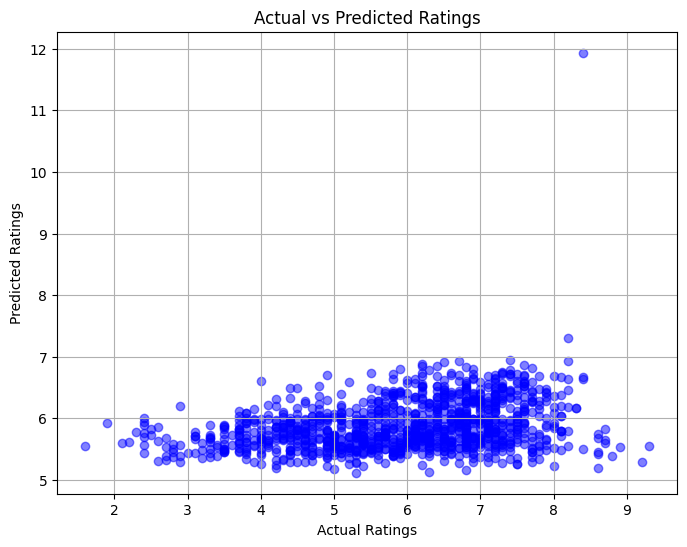

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.grid(True)
plt.show()
